In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix


import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics



In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [17]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [18]:
df_train_median_age = df_train.groupby(['Sex'])[['Age']].median().reset_index()
df_train_median_age.rename(columns={'Age':'Median_Age'}, inplace=True)
df_train_median_age

,Sex,Median_Age
0,female,27.0
1,male,29.0


In [19]:
df_train = pd.merge(left=df_train,right=df_train_median_age,on='Sex',how='left')
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Median_Age
0,0,3,male,22.0,1,0,7.2500,S,29.0
1,1,1,female,38.0,1,0,71.2833,C,27.0
2,1,3,female,26.0,0,0,7.9250,S,27.0
3,1,1,female,35.0,1,0,53.1000,S,27.0
4,0,3,male,35.0,0,0,8.0500,S,29.0


In [20]:
df_train['Age'] = df_train.apply(lambda x : x[8] if pd.isna(x[3]) else x[3], axis=1)

In [21]:
df_train['Age'].isnull().sum()

0

In [22]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Median_Age    0
dtype: int64

In [23]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [25]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [26]:
df_test_median_age = df_test.groupby(['Sex'])[['Age']].median().reset_index()
df_test_median_age.rename(columns={'Age':'Median_Age'},inplace=True)
df_test_median_age

,Sex,Median_Age
0,female,27.0
1,male,27.0


In [27]:
df_test = pd.merge(left=df_test, right=df_test_median_age, on='Sex', how='left')
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Median_Age
0,3,male,34.5,0,0,7.8292,Q,27.0
1,3,female,47.0,1,0,7.0000,S,27.0
2,2,male,62.0,0,0,9.6875,Q,27.0
3,3,male,27.0,0,0,8.6625,S,27.0
4,3,female,22.0,1,1,12.2875,S,27.0


In [28]:
df_test['Age']=df_test.apply(lambda x: x[7] if pd.isna(x[2]) else x[2], axis=1)

In [29]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Median_Age    0
dtype: int64

In [30]:
df_test[pd.isna(df_test['Fare'])]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Median_Age
152,3,male,60.5,0,0,NaN,S,27.0


In [31]:
df_test.groupby(['Pclass'])[['Fare']].median().reset_index()

,Pclass,Fare
0,1,60.0000
1,2,15.7500
2,3,7.8958


In [32]:
df_test['Fare'].fillna(7.8958, inplace=True)

In [33]:
df_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Median_Age    0
dtype: int64

In [34]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Median_Age    0
dtype: int64

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Median_Age    891 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 69.6+ KB


In [37]:
# converting the columns Sex and Embarked to from categorical to numeric

df_train = pd.get_dummies(columns=['Sex','Embarked'], data=df_train)


In [38]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Median_Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,29.0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,27.0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,27.0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,27.0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,29.0,0,1,0,0,1


In [46]:
df_train.drop(['Median_Age'],axis=1,inplace=True)

In [47]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [39]:
df_test= pd.get_dummies(columns=['Sex','Embarked'], data=df_test)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Median_Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,27.0,0,1,0,1,0
1,3,47.0,1,0,7.0000,27.0,1,0,0,0,1
2,2,62.0,0,0,9.6875,27.0,0,1,0,1,0
3,3,27.0,0,0,8.6625,27.0,0,1,0,0,1
4,3,22.0,1,1,12.2875,27.0,1,0,0,0,1


In [48]:
df_test.drop(['Median_Age'],axis=1,inplace=True)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


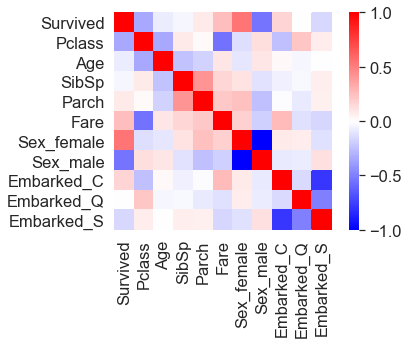

In [49]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train.corr(), square=True,cmap='bwr')
plt.show()

In [42]:
# converting the data into standard scaler

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
df_train_scaler = StandardScaler()

In [50]:
df_train[['Pclass','Age','SibSp','Parch','Fare']] = df_train_scaler.fit_transform(df_train[['Pclass','Age','SibSp','Parch','Fare']])

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,-0.571902,0.432793,-0.473674,-0.502445,0,1,0,0,1
1,1,-1.566107,0.657785,0.432793,-0.473674,0.786845,1,0,1,0,0
2,1,0.827377,-0.264480,-0.474545,-0.473674,-0.488854,1,0,0,0,1
3,1,-1.566107,0.427219,0.432793,-0.473674,0.420730,1,0,0,0,1
4,0,0.827377,0.427219,-0.474545,-0.473674,-0.486337,0,1,0,0,1


In [53]:
df_test_scaler = StandardScaler()

In [55]:
df_test[['Pclass','Age','SibSp','Parch','Fare']] = df_test_scaler.fit_transform(df_test[['Pclass','Age','SibSp','Parch','Fare']])
df_test.head()

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497071,0,1,0,1,0
1,0.873482,1.371370,0.616992,-0.400248,-0.511934,1,0,0,0,1
2,-0.315819,2.553537,-0.499470,-0.400248,-0.463762,0,1,0,1,0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482135,0,1,0,0,1
4,0.873482,-0.598908,0.616992,0.619896,-0.417159,1,0,0,0,1


In [56]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train[['Survived']]

In [57]:
LogReg = LogisticRegression()

In [58]:
LogReg.fit(X_train,y_train)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_train_pred = LogReg.predict(X_train)

In [61]:
y_train_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [62]:
y_train_proob = LogReg.predict_proba(X_train)
y_train_proob

array([[0.91007569, 0.08992431],
       [0.08202654, 0.91797346],
       [0.37552484, 0.62447516],
       ...,
       [0.49711629, 0.50288371],
       [0.38782589, 0.61217411],
       [0.88577447, 0.11422553]])

In [63]:
confusion_matrix(y_pred=y_train_pred, y_true=y_train )

array([[474,  75],
       [102, 240]], dtype=int64)

In [76]:
474+102

576

In [83]:
#side note
print(df_train['Survived'].value_counts())
print(df_train.shape)
print(df_train['Survived'].value_counts()/df_train.shape[0])

0    549
1    342
Name: Survived, dtype: int64
(891, 11)
0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [ ]:
# we see a good distribution of survived and not survived,
#here not survived is around 61 % and survived is around 38%

In [ ]:
# 0ut of 576 not survived, the model pedicted correctly 474 instaces as not survived

In [77]:
75+240

315

In [ ]:
# out of 315 survived, the model predicted correctly 240 instances as suvived

In [78]:
#Accuracy
(474+240)/(474+75+102+240)

0.8013468013468014

In [64]:
print(accuracy_score(y_pred=y_train_pred, y_true=y_train ))
print(precision_score(y_pred=y_train_pred, y_true=y_train ))
print(recall_score(y_pred=y_train_pred, y_true=y_train ))

0.8013468013468014
0.7619047619047619
0.7017543859649122


In [79]:
print(classification_report(y_pred=y_train_pred, y_true=y_train))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

   micro avg       0.80      0.80      0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [84]:
# prediction using the Test data set

In [85]:
X_test = df_test

In [87]:
y_pred_test = LogReg.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
y_prob_test = LogReg.predict_proba(X_test)
y_prob_test

array([[0.89863026, 0.10136974],
       [0.67880836, 0.32119164],
       [0.89991005, 0.10008995],
       [0.90164467, 0.09835533],
       [0.45437564, 0.54562436],
       [0.84538407, 0.15461593],
       [0.34229932, 0.65770068],
       [0.82177789, 0.17822211],
       [0.23243255, 0.76756745],
       [0.93908056, 0.06091944],
       [0.90176986, 0.09823014],
       [0.68795277, 0.31204723],
       [0.07660248, 0.92339752],
       [0.94938711, 0.05061289],
       [0.18266135, 0.81733865],
       [0.15780466, 0.84219534],
       [0.75401584, 0.24598416],
       [0.82940293, 0.17059707],
       [0.48828572, 0.51171428],
       [0.46917809, 0.53082191],
       [0.74656862, 0.25343138],
       [0.82947287, 0.17052713],
       [0.06718891, 0.93281109],
       [0.35548407, 0.64451593],
       [0.11738196, 0.88261804],
       [0.97098518, 0.02901482],
       [0.03866262, 0.96133738],
       [0.8376589 , 0.1623411 ],
       [0.64196659, 0.35803341],
       [0.92950417, 0.07049583],
       [0.